In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

In [3]:
#import csv
raw = pd.read_csv(r'ML_2_Fellow.csv',encoding='windows-1252')
print(raw.head(5))
print(raw.dtypes)

  Kode_Bayar Kode_Barang                               Barang  Jumlah  \
0     536365      85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.0   
1     536365       71053                  WHITE METAL LANTERN     6.0   
2     536365      84406B       CREAM CUPID HEARTS COAT HANGER     8.0   
3     536365      84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.0   
4     536365      84029E       RED WOOLLY HOTTIE WHITE HEART.     6.0   

  Tanggal_Transaksi  Harga_Satuan  Kode_Pelanggan          Negara  
0    12/1/2010 8:26          2.55         17850.0  United Kingdom  
1    12/1/2010 8:26          3.39         17850.0  United Kingdom  
2    12/1/2010 8:26          2.75         17850.0  United Kingdom  
3    12/1/2010 8:26          3.39         17850.0  United Kingdom  
4    12/1/2010 8:26          3.39         17850.0  United Kingdom  
Kode_Bayar            object
Kode_Barang           object
Barang                object
Jumlah               float64
Tanggal_Transaksi     object
Harga_Sa

In [4]:
df = raw
#membuat column baru "Nilai_Transaksi" dari "Harga_Satuan" * "Jumlah"
df['Nilai_Transaksi'] = df.apply(lambda row: row['Harga_Satuan'] * row['Jumlah'], axis=1)

#drop row yang column Jumlah atau Harga_Satuannya <= 0
index_drop = df[(df['Jumlah'] <= 0) | (df['Harga_Satuan'] <=0)].index
df.drop(index_drop, inplace=True)

#drop row Kode_Bayar yang bukan tipe data numeric
df['Kode_Bayar'] = pd.to_numeric(df['Kode_Bayar'],errors='coerce')
df.dropna(inplace=True)

print(df.head(5))

  Kode_Bayar Kode_Barang                               Barang  Jumlah  \
0     536365      85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.0   
1     536365       71053                  WHITE METAL LANTERN     6.0   
2     536365      84406B       CREAM CUPID HEARTS COAT HANGER     8.0   
3     536365      84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.0   
4     536365      84029E       RED WOOLLY HOTTIE WHITE HEART.     6.0   

  Tanggal_Transaksi  Harga_Satuan Kode_Pelanggan          Negara  \
0    12/1/2010 8:26          2.55        17850.0  United Kingdom   
1    12/1/2010 8:26          3.39        17850.0  United Kingdom   
2    12/1/2010 8:26          2.75        17850.0  United Kingdom   
3    12/1/2010 8:26          3.39        17850.0  United Kingdom   
4    12/1/2010 8:26          3.39        17850.0  United Kingdom   

   Nilai_Transaksi  
0            15.30  
1            20.34  
2            22.00  
3            20.34  
4            20.34  


In [5]:
#mengelompokkan column Barang berdasarkan Jumlah untuk mendapatkan mana Barang yang Jumlah demandnya paling tingi
df.groupby('Barang').agg({'Jumlah':sum}).sort_values(['Jumlah'],ascending=False).head(5)

,Jumlah
Barang,
MEDIUM CERAMIC TOP STORAGE JAR,78033.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047.0
JUMBO BAG RED RETROSPOT,48474.0
WHITE HANGING HEART T-LIGHT HOLDER,37891.0
POPCORN HOLDER,36761.0


In [6]:
#mengelompokkan barang yang Nilai_Transaksinya terendah untuk mengetahui mana Barang yang bisa diabaikan
df.groupby('Barang').agg({'Nilai_Transaksi':sum}).sort_values(['Nilai_Transaksi'],ascending=True).head(5)

,Nilai_Transaksi
Barang,
PADS TO MATCH ALL CUSHIONS,0.003
HEN HOUSE W CHICK IN NEST,0.420
SET 12 COLOURING PENCILS DOILEY,0.650
VINTAGE BLUE TINSEL REEL,0.840
PINK CRYSTAL GUITAR PHONE CHARM,0.850


In [7]:
#mengelompokkan negara berdasarkan Nilai_Transaksi untuk mengetahui negara mana yang paling besar transaksinya
df.groupby('Negara').agg({'Nilai_Transaksi':sum}).sort_values(['Nilai_Transaksi'],ascending=False).head(10)

,Nilai_Transaksi
Negara,
United Kingdom,8.798801e+06
Netherlands,2.840239e+05
EIRE,2.818126e+05
Germany,2.279107e+05
France,2.093818e+05
Australia,1.367377e+05
Spain,6.141979e+04
Switzerland,5.686838e+04
Belgium,4.101436e+04


In [16]:
#Mengeliminasi duplikat customer yang transaksi berulang kali
Customer_perCountry = df[['Negara','Kode_Pelanggan']].drop_duplicates()

#Mengelompokkan jumlah customer di tiap  negara
Customer_perCountry.groupby(['Negara']).agg({'Kode_Pelanggan':'count'}).sort_values(['Kode_Pelanggan'],ascending=False)


,Kode_Pelanggan
Negara,
United Kingdom,3919
Germany,94
France,88
Spain,30
Belgium,25
Switzerland,22
Portugal,20
Italy,14
Finland,12


In [48]:
#buat data clustering yang hanya berisi column Harga_Satuan dan Jumlah
cd = df[['Harga_Satuan','Jumlah']]



In [12]:
# transform data dengan cara di normalisasi  dengan StandardScaler()
X = cd.values
X = np.nan_to_num(X)
sc = StandardScaler()

cluster_data = sc.fit_transform(X)

In [17]:
# Modeling data dengan KMeans Clustering

clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 10)
model.fit(X)

labels = model.labels_

In [18]:
# Menambahkan label no cluster atau Cluster_Num ke column df
df['Cluster_Num'] = labels
print(df.head())

  Kode_Bayar Kode_Barang                               Barang  Jumlah  \
0     536365      85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.0   
1     536365       71053                  WHITE METAL LANTERN     6.0   
2     536365      84406B       CREAM CUPID HEARTS COAT HANGER     8.0   
3     536365      84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.0   
4     536365      84029E       RED WOOLLY HOTTIE WHITE HEART.     6.0   

  Tanggal_Transaksi  Harga_Satuan Kode_Pelanggan          Negara  \
0    12/1/2010 8:26          2.55        17850.0  United Kingdom   
1    12/1/2010 8:26          3.39        17850.0  United Kingdom   
2    12/1/2010 8:26          2.75        17850.0  United Kingdom   
3    12/1/2010 8:26          3.39        17850.0  United Kingdom   
4    12/1/2010 8:26          3.39        17850.0  United Kingdom   

   Nilai_Transaksi  Cluster_Num  
0            15.30            0  
1            20.34            0  
2            22.00            0  
3            20.

In [27]:
#melihat jumlah anggota tiap cluster
df.groupby('Cluster_Num').count()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Nilai_Transaksi
Cluster_Num,,,,,,,,,
0,529770,523735,523735,523735,523735,523735,529770,523735,523735
1,1,1,1,1,1,1,1,1,1
2,417,417,417,417,417,417,417,417,417


In [28]:
#melihat rata-rata nilai column Jumlah, Harga_Satuan, dan Nilai Transaksi tiap cluster
df.groupby('Cluster_Num').mean()

,Jumlah,Harga_Satuan,Nilai_Transaksi
Cluster_Num,,,
0,9.776962,3.668951,18.234101
1,74215.000000,1.040000,77183.600000
2,606.585132,325.945755,1927.962110


C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribusi Jumlah dan Harga Satuan berdasarkan Cluster')

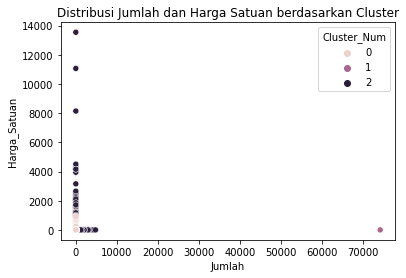

In [31]:
#plot hasil clustering ke dalam scatterplot
sb.scatterplot(x='Jumlah', y='Harga_Satuan', hue='Cluster_Num', data=df)
plt.title('Distribusi Jumlah dan Harga Satuan berdasarkan Cluster')

In [55]:
#mengelompokkan data untuk melihat berapa jumlah customer di tiap negara dan tiap cluster
df.groupby(['Negara','Cluster_Num']).agg({'Kode_Pelanggan':'count'}).sort_values(by='Kode_Pelanggan',ascending=False)


,,Kode_Pelanggan
Negara,Cluster_Num,
United Kingdom,0,479069
Germany,0,8996
France,0,8371
EIRE,0,7822
Spain,0,2458
Netherlands,0,2336
Belgium,0,2022
Switzerland,0,1955
Portugal,0,1494


In [51]:
#melihat jumlah nilai transaksi dari cluster 0
df_clus_0 = df[df['Cluster_Num']==0]
df_clus_0.groupby(['Negara']).agg({'Nilai_Transaksi':sum}).sort_values(['Nilai_Transaksi'],ascending=False)

,Nilai_Transaksi
Negara,
United Kingdom,8.000215e+06
Netherlands,2.707077e+05
EIRE,2.651160e+05
Germany,2.279107e+05
France,1.982909e+05
Australia,1.326853e+05
Switzerland,5.686838e+04
Spain,5.384899e+04
Belgium,4.101436e+04


In [53]:
#melihat jumlah nilai transaksi dari cluster 1
df_clus_1 = df[df['Cluster_Num']==1]
df_clus_1.groupby(['Negara']).agg({'Nilai_Transaksi':sum}).sort_values(['Nilai_Transaksi'],ascending=False)

,Nilai_Transaksi
Negara,
United Kingdom,77183.6


In [56]:
#melihat data transaksi customer di cluster 1
print(df_clus_1)

       Kode_Bayar Kode_Barang                          Barang   Jumlah  \
61619    541431.0       23166  MEDIUM CERAMIC TOP STORAGE JAR  74215.0   

      Tanggal_Transaksi  Harga_Satuan Kode_Pelanggan          Negara  \
61619   1/18/2011 10:01          1.04        12346.0  United Kingdom   

       Nilai_Transaksi  Cluster_Num  
61619          77183.6            1  


In [54]:
#melihat jumlah nilai transaksi dari cluster 2
df_clus_2 = df[df['Cluster_Num']==2]
df_clus_2.groupby(['Negara']).agg({'Nilai_Transaksi':sum}).sort_values(['Nilai_Transaksi'],ascending=False)

,Nilai_Transaksi
Negara,
United Kingdom,710340.15
EIRE,16696.66
Netherlands,13316.16
Singapore,11757.00
France,11090.90
Japan,9164.40
Spain,7570.80
Hong Kong,5237.71
Australia,4052.40
